In [162]:
from datetime import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# import plotly.express as px
# import plotly.io as pio
import plotly.graph_objects as go

In [163]:
rfm_df = pd.read_csv("./rfm_data.csv", parse_dates=["PurchaseDate"])
rfm_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


## Calculating RFM Values - Recency, Frequency and Monetary


##### Recency: the date they made their last purchase


In [164]:
rfm_df["Recency"] = pd.to_timedelta(
    datetime.now().date() - rfm_df["PurchaseDate"].dt.date
).dt.days
rfm_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,399
1,2188,2023-04-11,463.70,Product A,176819,London,399
2,4608,2023-04-11,80.28,Product A,340062,New York,399
3,2559,2023-04-11,221.29,Product A,239145,London,399
4,9482,2023-04-11,739.56,Product A,194545,Paris,399
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,339
996,6669,2023-06-10,941.50,Product C,987025,New York,339
997,8836,2023-06-10,545.36,Product C,512842,London,339
998,1440,2023-06-10,729.94,Product B,559753,Paris,339


##### Frequency: how often they make purchases


In [165]:
frequency_data = (
    rfm_df.groupby("CustomerID")
    .aggregate({"OrderID": "count"})
    .rename(columns={"OrderID": "Frequency"})
    .reset_index()
)
frequency_data

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


In [166]:
rfm_df = rfm_df.merge(frequency_data, on="CustomerID", how="left")
rfm_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,399,1
1,2188,2023-04-11,463.70,Product A,176819,London,399,1
2,4608,2023-04-11,80.28,Product A,340062,New York,399,1
3,2559,2023-04-11,221.29,Product A,239145,London,399,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,399,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,339,1
996,6669,2023-06-10,941.50,Product C,987025,New York,339,1
997,8836,2023-06-10,545.36,Product C,512842,London,339,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,339,1


##### Monetary: the amount spent on purchases


In [167]:
monetary_data = (
    rfm_df.groupby("CustomerID")
    .aggregate({"TransactionAmount": "sum"})
    .rename(columns={"TransactionAmount": "MonetaryValue"})
    .reset_index()
)
monetary_data

,CustomerID,MonetaryValue
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72
...,...,...
941,9941,960.53
942,9950,679.11
943,9954,798.01
944,9985,36.10


In [168]:
rfm_df = rfm_df.merge(monetary_data, on="CustomerID", how="left")
rfm_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,399,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,399,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,399,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,399,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,399,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,339,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,339,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,339,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,339,1,729.94


### Calculating RFM Scores


In [169]:
# Define scoring criteria for each RFM value
# Higher score for lower recency (more recent)
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# To calculate RFM scores, we used the pd.cut() function to divide recency, frequency, and monetary values into bins.
# We define 5 bins for each value and assign the corresponding scores to each bin.
rfm_df["RecencyScore"] = pd.cut(
    rfm_df["Recency"], bins=5, labels=recency_scores)
rfm_df["FrequencyScore"] = pd.cut(
    rfm_df["Frequency"], bins=5, labels=frequency_scores)
rfm_df["MonetaryScore"] = pd.cut(
    rfm_df["MonetaryValue"], bins=5, labels=monetary_scores
)

# Convert RFM scores to numeric type
rfm_df["RecencyScore"] = rfm_df["RecencyScore"].astype(int)
rfm_df["FrequencyScore"] = rfm_df["FrequencyScore"].astype(int)
rfm_df["MonetaryScore"] = rfm_df["MonetaryScore"].astype(int)
rfm_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,399,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,399,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,399,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,399,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,399,1,739.56,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,339,1,759.62,5,1,2
996,6669,2023-06-10,941.50,Product C,987025,New York,339,1,941.50,5,1,2
997,8836,2023-06-10,545.36,Product C,512842,London,339,1,545.36,5,1,2
998,1440,2023-06-10,729.94,Product B,559753,Paris,339,1,729.94,5,1,2


### RFM Value Segmentation

##### The RFM Value Segment represents the categorization of customers based on their RFM scores into groups such as “low value”, “medium value”, and “high value”.


In [170]:
# Calculate RFM score by combining the individual scores
rfm_df["RFM_Score"] = (
    rfm_df["RecencyScore"] + rfm_df["FrequencyScore"] + rfm_df["MonetaryScore"]
)

# Create RFM segments based on the RFM score
segment_labels = ["Low-Value", "Mid-Value", "High-Value"]
rfm_df["Value Segment"] = pd.qcut(
    rfm_df["RFM_Score"], q=3, labels=segment_labels)
rfm_df[
    [
        "CustomerID",
        "PurchaseDate",
        "TransactionAmount",
        "Recency",
        "Frequency",
        "MonetaryValue",
        "RecencyScore",
        "FrequencyScore",
        "MonetaryScore",
        "RFM_Score",
        "Value Segment",
    ]
]

,CustomerID,PurchaseDate,TransactionAmount,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,399,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,399,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,399,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,399,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,399,1,739.56,1,1,2,4,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,339,1,759.62,5,1,2,8,High-Value
996,6669,2023-06-10,941.50,339,1,941.50,5,1,2,8,High-Value
997,8836,2023-06-10,545.36,339,1,545.36,5,1,2,8,High-Value
998,1440,2023-06-10,729.94,339,1,729.94,5,1,2,8,High-Value


### RFM Segment Distribution


In [171]:
segment_counts = rfm_df["Value Segment"].value_counts().reset_index()
segment_counts.columns = ["RFM Value Segments", "Number of Customers"]
segment_counts

,RFM Value Segments,Number of Customers
0,Low-Value,435
1,Mid-Value,386
2,High-Value,179


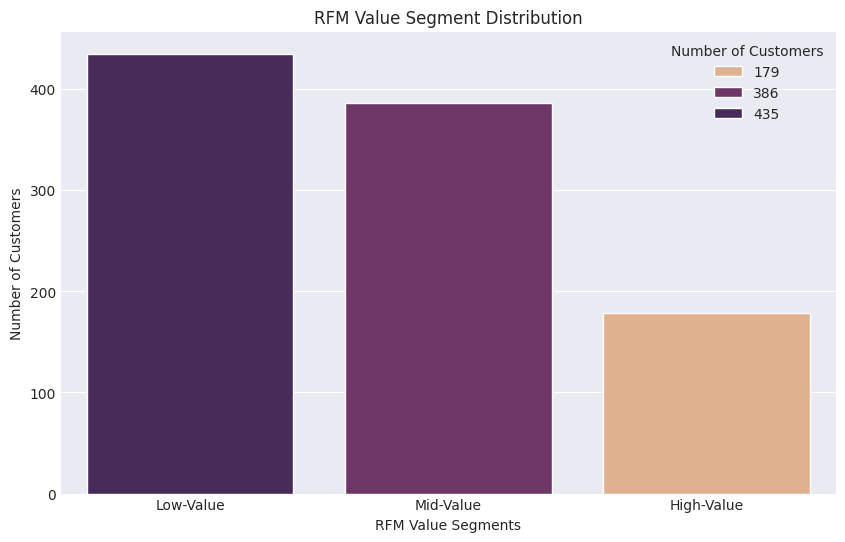

In [172]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=segment_counts,
    x="RFM Value Segments",
    y="Number of Customers",
    hue="Number of Customers",
    palette="flare",
)
plt.title("RFM Value Segment Distribution")
plt.show()

### RFM Customer Segments


In [173]:
def customer_segment_category(score):
    match score:
        case score if score >= 9:
            return "Champions"
        case score if 6 <= score < 9:
            return "Potential Loyalists"
        case score if 5 <= score < 6:
            return "At Risk Customers"
        case score if 4 <= score < 5:
            return "Can't Lose"
        case _:
            return "Lost"

In [174]:
rfm_df["RFM Customer Segment"] = rfm_df["RFM_Score"].apply(
    customer_segment_category)
rfm_df[
    [
        "CustomerID",
        "PurchaseDate",
        "TransactionAmount",
        "Recency",
        "Frequency",
        "MonetaryValue",
        "RecencyScore",
        "FrequencyScore",
        "MonetaryScore",
        "RFM_Score",
        "Value Segment",
        "RFM Customer Segment",
    ]
]

,CustomerID,PurchaseDate,TransactionAmount,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segment
0,8814,2023-04-11,943.31,399,1,943.31,1,1,2,4,Low-Value,Can't Lose
1,2188,2023-04-11,463.70,399,1,463.70,1,1,1,3,Low-Value,Lost
2,4608,2023-04-11,80.28,399,1,80.28,1,1,1,3,Low-Value,Lost
3,2559,2023-04-11,221.29,399,1,221.29,1,1,1,3,Low-Value,Lost
4,9482,2023-04-11,739.56,399,1,739.56,1,1,2,4,Low-Value,Can't Lose
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,339,1,759.62,5,1,2,8,High-Value,Potential Loyalists
996,6669,2023-06-10,941.50,339,1,941.50,5,1,2,8,High-Value,Potential Loyalists
997,8836,2023-06-10,545.36,339,1,545.36,5,1,2,8,High-Value,Potential Loyalists
998,1440,2023-06-10,729.94,339,1,729.94,5,1,2,8,High-Value,Potential Loyalists


##### Calculate the no of customers for each customer segments


In [175]:
customer_segment_counts = rfm_df["RFM Customer Segment"].value_counts(
).reset_index()
customer_segment_counts.columns = [
    "RFM Customer Segments", "Number of Customers"]
customer_segment_counts

,RFM Customer Segments,Number of Customers
0,Potential Loyalists,503
1,At Risk Customers,180
2,Can't Lose,173
3,Lost,82
4,Champions,62


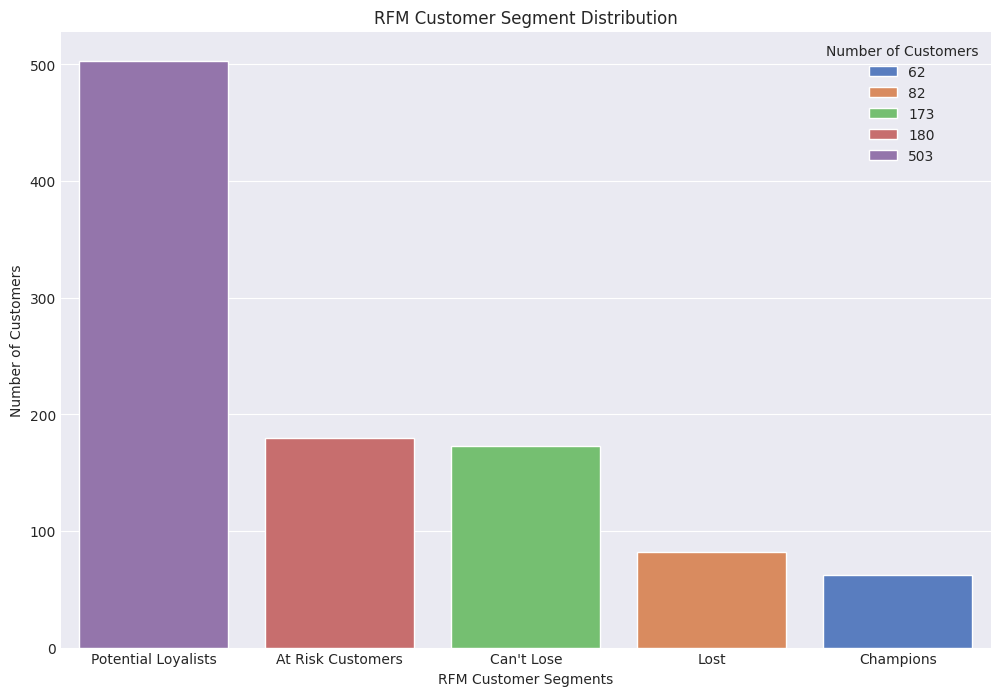

In [176]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
sns.barplot(
    data=customer_segment_counts,
    x="RFM Customer Segments",
    y="Number of Customers",
    hue="Number of Customers",
    palette="muted",
)
plt.title("RFM Customer Segment Distribution")
plt.show()

##### Calculate the average Recency, Frequency, and Monetary scores for each customer segment


In [177]:
customer_segment_scores = (
    rfm_df.groupby("RFM Customer Segment")[
        ["RecencyScore", "FrequencyScore", "MonetaryScore"]
    ]
    .mean()
    .reset_index()
)
customer_segment_scores

,RFM Customer Segment,RecencyScore,FrequencyScore,MonetaryScore
0,At Risk Customers,2.344444,1.011111,1.644444
1,Can't Lose,1.537572,1.000000,1.462428
2,Champions,3.806452,3.064516,3.225806
3,Lost,1.000000,1.000000,1.000000
4,Potential Loyalists,3.918489,1.194831,1.741551


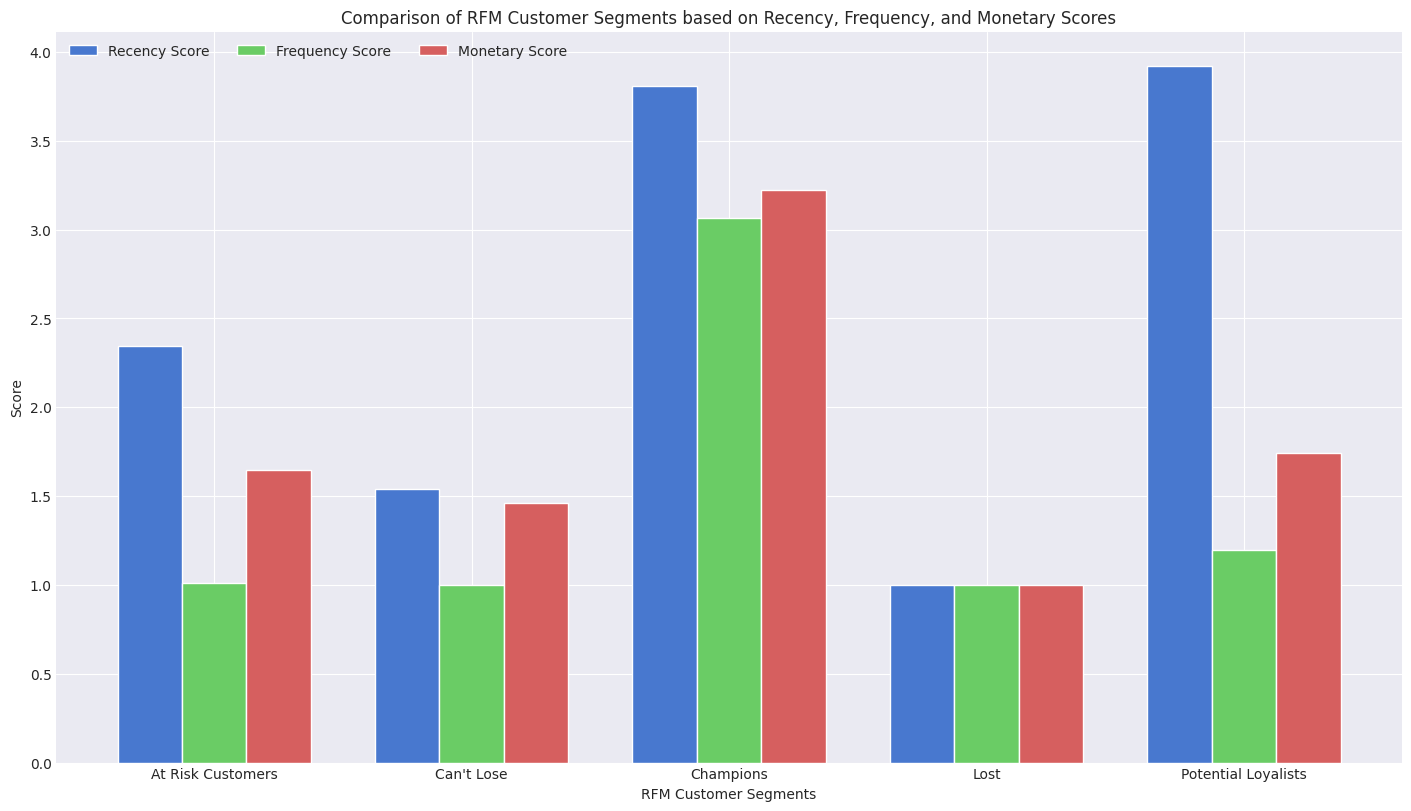

In [178]:
# Grouped bar chart with labels
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(customer_segment_scores["RFM Customer Segment"]))
width = 0.25  # the width of the bars

fig, ax = plt.subplots(layout="constrained", figsize=(14, 8))

ax.bar(x, customer_segment_scores["RecencyScore"],
       width, label="Recency Score")

ax.bar(
    x + width, customer_segment_scores["FrequencyScore"], width, label="Frequency Score"
)

ax.bar(
    x + width * 2,
    customer_segment_scores["MonetaryScore"],
    width,
    label="Monetary Score",
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    "Comparison of RFM Customer Segments based on Recency, Frequency, and Monetary Scores"
)
ax.set_xlabel("RFM Customer Segments")
ax.set_ylabel("Score")
ax.set_xticks(x + width, customer_segment_scores["RFM Customer Segment"])
ax.legend(loc="upper left", ncols=3)

plt.show()

#### The bar plot shown above is reproduced below using the Plotly Python library.


In [179]:
# Create a grouped bar chart to compare segment scores using plotly python library
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(
    go.Bar(
        x=customer_segment_scores["RFM Customer Segment"],
        y=customer_segment_scores["RecencyScore"],
        name="Recency Score",
        marker_color="rgb(158,202,225)",
    )
)

# Add bars for Frequency score
fig.add_trace(
    go.Bar(
        x=customer_segment_scores["RFM Customer Segment"],
        y=customer_segment_scores["FrequencyScore"],
        name="Frequency Score",
        marker_color="rgb(94,158,217)",
    )
)

# Add bars for Monetary score
fig.add_trace(
    go.Bar(
        x=customer_segment_scores["RFM Customer Segment"],
        y=customer_segment_scores["MonetaryScore"],
        name="Monetary Score",
        marker_color="rgb(32,102,148)",
    )
)

# Update the layout
fig.update_layout(
    title="Comparison of RFM Customer Segments based on Recency, Frequency, and Monetary Scores",
    xaxis_title="RFM Customer Segments",
    yaxis_title="Score",
    barmode="group",
    showlegend=True,
    width=1400,
    height=800,
)

fig.show()

### Now let’s analyze the distribution of RFM values within the Champions segment


In [180]:
champions_segment = rfm_df[rfm_df["RFM Customer Segment"] == "Champions"]
champions_segment[
    [
        "CustomerID",
        "PurchaseDate",
        "TransactionAmount",
        "Recency",
        "Frequency",
        "MonetaryValue",
        "RecencyScore",
        "FrequencyScore",
        "MonetaryScore",
        "RFM_Score",
        "Value Segment",
        "RFM Customer Segment",
    ]
]

,CustomerID,PurchaseDate,TransactionAmount,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segment
63,5557,2023-04-14,511.86,396,3,2379.45,1,5,5,11,High-Value,Champions
180,5557,2023-04-22,996.98,388,3,2379.45,1,5,5,11,High-Value,Champions
220,3938,2023-04-25,806.29,385,2,1731.53,2,3,4,9,High-Value,Champions
235,4804,2023-04-25,690.50,385,3,2073.33,2,5,5,12,High-Value,Champions
249,7363,2023-04-26,262.45,384,3,1386.32,2,5,3,10,High-Value,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...
951,1480,2023-06-07,812.58,342,2,1621.62,5,3,4,12,High-Value,Champions
952,9066,2023-06-07,985.51,342,1,985.51,5,1,3,9,High-Value,Champions
965,1803,2023-06-08,610.34,341,2,1033.13,5,3,3,11,High-Value,Champions
972,7296,2023-06-09,984.60,340,1,984.60,5,1,3,9,High-Value,Champions


In [181]:
fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment["RecencyScore"], name="Recency"))
fig.add_trace(go.Box(y=champions_segment["FrequencyScore"], name="Frequency"))
fig.add_trace(go.Box(y=champions_segment["MonetaryScore"], name="Monetary"))

fig.update_layout(
    title="Distribution of RFM Values within Champions Segment",
    yaxis_title="RFM Value",
    showlegend=True,
    width=1400,
    height=800,
)

fig.show()